# Longitudinal Demographic Analysis of Minnesota Counties
**A project analyzing demographic, educational, economic, and housing trends (2009–2024).**

## 1. Introduction & Objectives

This research project focuses on the ten most populous counties in
Minnesota, analyzing demographic, educational, economic, and housing
trends from 2009 to 2024. The objectives are:
*   Track the well-being of each county using key metrics such as income
levels, educational attainment, homeownership, and population change.
*   Identify correlations and disparities between counties and across time.
*   Use historical data to support the prediction of life outcomes.

## 2. Data Sources & Description

| File             | Description / Link                                 |
|------------------|----------------------------------------------------|
| demographics.csv | County population by year                          |
| education.csv    | HS & BA attainment rates                           |
| economy.csv      | Median income, poverty, etc.                       |
| housing.csv      | Homeownership rates, median home values            |

## 3. Data Cleaning & Preparation

### Data Loading & Setup

In [1]:
%pip install -U kaleido plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [2]:
import os
print(os.getcwd())

/content


In [3]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
pio.templates.default = "plotly_white+presentation"
pd.options.plotting.backend = "plotly"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
demo_df = pd.read_csv('/content/drive/MyDrive/demographics.csv', sep='\t')
demo_df.columns = [c.strip() for c in demo_df.columns]
demo_df

,County,Table,Year,Population,WhiteAlone,NextHighestPop,NextHighestPopGrp,MedianAge,ImmigrantPop
0,Anoka,Demographics,2009-13,334027,86.6,4.5,Black/African American,37.4,6.7
1,Dakota,Demographics,2009-13,402306,85.3,4.9,Black/African American,37.1,8.2
2,Hennepin,Demographics,2009-13,1170623,75.2,11.7,Black/African American,36.0,12.9
3,Olmsted,Demographics,2009-13,146063,86.3,5.4,Asian,36.4,9.7
4,Ramsey,Demographics,2009-13,515732,70.8,12.3,Asian,34.6,14.3
5,Scott,Demographics,2009-13,132774,86.7,5.6,Asian,35.1,8.6
6,St. Louis,Demographics,2009-13,200327,92.9,2.3,American Indian/Alaskan Native,40.8,2.1
7,Stearns,Demographics,2009-13,151053,91.8,3.3,Black/African American,33.4,4.1
8,Washington,Demographics,2009-13,241315,87.8,5.2,Asian,38.5,6.2
9,Wright,Demographics,2009-13,126142,94.5,2.6,Hispanic/Latino,34.8,3.0


In [6]:
edu_df = pd.read_csv('/content/drive/MyDrive/education.csv', sep='\t')
edu_df.columns = [c.strip() for c in edu_df.columns]
edu_df

,County,Table,Year,HighSchoolGraduationRate,BachelorsOrHigher
0,Anoka,Education,2009-13,93.3,26.9
1,Dakota,Education,2009-13,94.7,38.7
2,Olmsted,Education,2009-13,94.3,40.1
3,Wright,Education,2009-13,93.5,26.5
4,Ramsey,Education,2014-18,90.1,41.9
5,St. Louis,Education,2014-18,94.2,28.7
6,Scott,Education,2014-18,94.8,39.3
7,Hennepin,Education,2019-23,94.0,53.3
8,Washington,Education,2019-23,96.3,48.9
9,Stearns,Education,2019-23,92.8,28.6


In [7]:
eco_df = pd.read_csv('/content/drive/MyDrive/economy.csv', sep='\t')
eco_df.columns = [c.strip() for c in eco_df.columns]
eco_df

,County,Table,Year,MedianHouseholdIncome,PovertyRate,UnemploymentRate
0,Anoka,Economy,2009-13,70380,7.4,7.8
1,Dakota,Economy,2009-13,73732,7.6,6.7
2,Olmsted,Economy,2009-13,66252,8.0,4.3
3,Wright,Economy,2009-13,71598,6.5,6.8
4,Ramsey,Economy,2014-18,62304,14.7,4.9
5,St. Louis,Economy,2014-18,53344,15.0,4.9
6,Scott,Economy,2014-18,97744,5.8,3.3
7,Hennepin,Economy,2019-23,96339,10.0,4.3
8,Washington,Economy,2019-23,114457,5.0,3.3
9,Stearns,Economy,2019-23,76447,12.2,4.3


In [8]:
housing_df = pd.read_csv('/content/drive/MyDrive/housing.csv', sep='\t')
housing_df.columns = [c.strip() for c in housing_df.columns]
housing_df

,County,Table,Year,HomeownershipRate,MedianHousingValue
0,Anoka,Housing,2009-13,81.4,192300
1,Hennepin,Housing,2009-13,63.7,230900
2,Ramsey,Housing,2009-13,59.8,198200
3,Dakota,Housing,2009-13,75.8,223300
4,Washington,Housing,2009-13,81.3,241900
5,St. Louis,Housing,2009-13,71.3,137500
6,Olmsted,Housing,2009-13,74.9,171100
7,Stearns,Housing,2009-13,71.8,167600
8,Scott,Housing,2009-13,84.8,244400
9,Wright,Housing,2009-13,83.9,195000


### Merge

Merging the Economy and Education tables.

In [9]:
ecoedu_df = (
    eco_df
    .merge(
        edu_df
        [['County', 'Year', 'HighSchoolGraduationRate', 'BachelorsOrHigher']],
        on=('County', 'Year'),
    )
    .merge(
        demo_df
        [['County', 'Year', 'Population']],
        on=('County', 'Year'),
    )
    .astype({'Population': int})
)
ecoedu_df

,County,Table,Year,MedianHouseholdIncome,PovertyRate,UnemploymentRate,HighSchoolGraduationRate,BachelorsOrHigher,Population
0,Anoka,Economy,2009-13,70380,7.4,7.8,93.3,26.9,334027
1,Dakota,Economy,2009-13,73732,7.6,6.7,94.7,38.7,402306
2,Olmsted,Economy,2009-13,66252,8.0,4.3,94.3,40.1,146063
3,Wright,Economy,2009-13,71598,6.5,6.8,93.5,26.5,126142
4,Ramsey,Economy,2014-18,62304,14.7,4.9,90.1,41.9,541493
5,St. Louis,Economy,2014-18,53344,15.0,4.9,94.2,28.7,200080
6,Scott,Economy,2014-18,97744,5.8,3.3,94.8,39.3,143372
7,Hennepin,Economy,2019-23,96339,10.0,4.3,94.0,53.3,1268903
8,Washington,Economy,2019-23,114457,5.0,3.3,96.3,48.9,272298
9,Stearns,Economy,2019-23,76447,12.2,4.3,92.8,28.6,159358


Merging the Economy and Housing tables.

In [10]:
ecohouse_df = (
    eco_df
    .merge(
        housing_df
        [['County', 'Year', 'HomeownershipRate', 'MedianHousingValue']],
        on=('County', 'Year'),
    )
    .merge(
        demo_df
        [['County', 'Year', 'Population']],
        on=('County', 'Year'),
    )
    .astype({'Population': int})
)
ecohouse_df

,County,Table,Year,MedianHouseholdIncome,PovertyRate,UnemploymentRate,HomeownershipRate,MedianHousingValue,Population
0,Anoka,Economy,2009-13,70380,7.4,7.8,81.4,192300,334027
1,Dakota,Economy,2009-13,73732,7.6,6.7,75.8,223300,402306
2,Olmsted,Economy,2009-13,66252,8.0,4.3,74.9,171100,146063
3,Wright,Economy,2009-13,71598,6.5,6.8,83.9,195000,126142
4,Ramsey,Economy,2014-18,62304,14.7,4.9,59.3,219400,541493
5,St. Louis,Economy,2014-18,53344,15.0,4.9,70.9,152200,200080
6,Scott,Economy,2014-18,97744,5.8,3.3,82.3,285200,143372
7,Hennepin,Economy,2019-23,96339,10.0,4.3,63.0,376500,1268903
8,Washington,Economy,2019-23,114457,5.0,3.3,81.2,400900,272298
9,Stearns,Economy,2019-23,76447,12.2,4.3,67.8,256500,159358


## 4. Exploratory Data Analysis

In [11]:
sns.set_theme(context='poster', style='whitegrid', palette='Pastel1')

### Higher Education Attainment vs. Median Household Income
*Why*: See how bachelor’s-degree rates map to median income

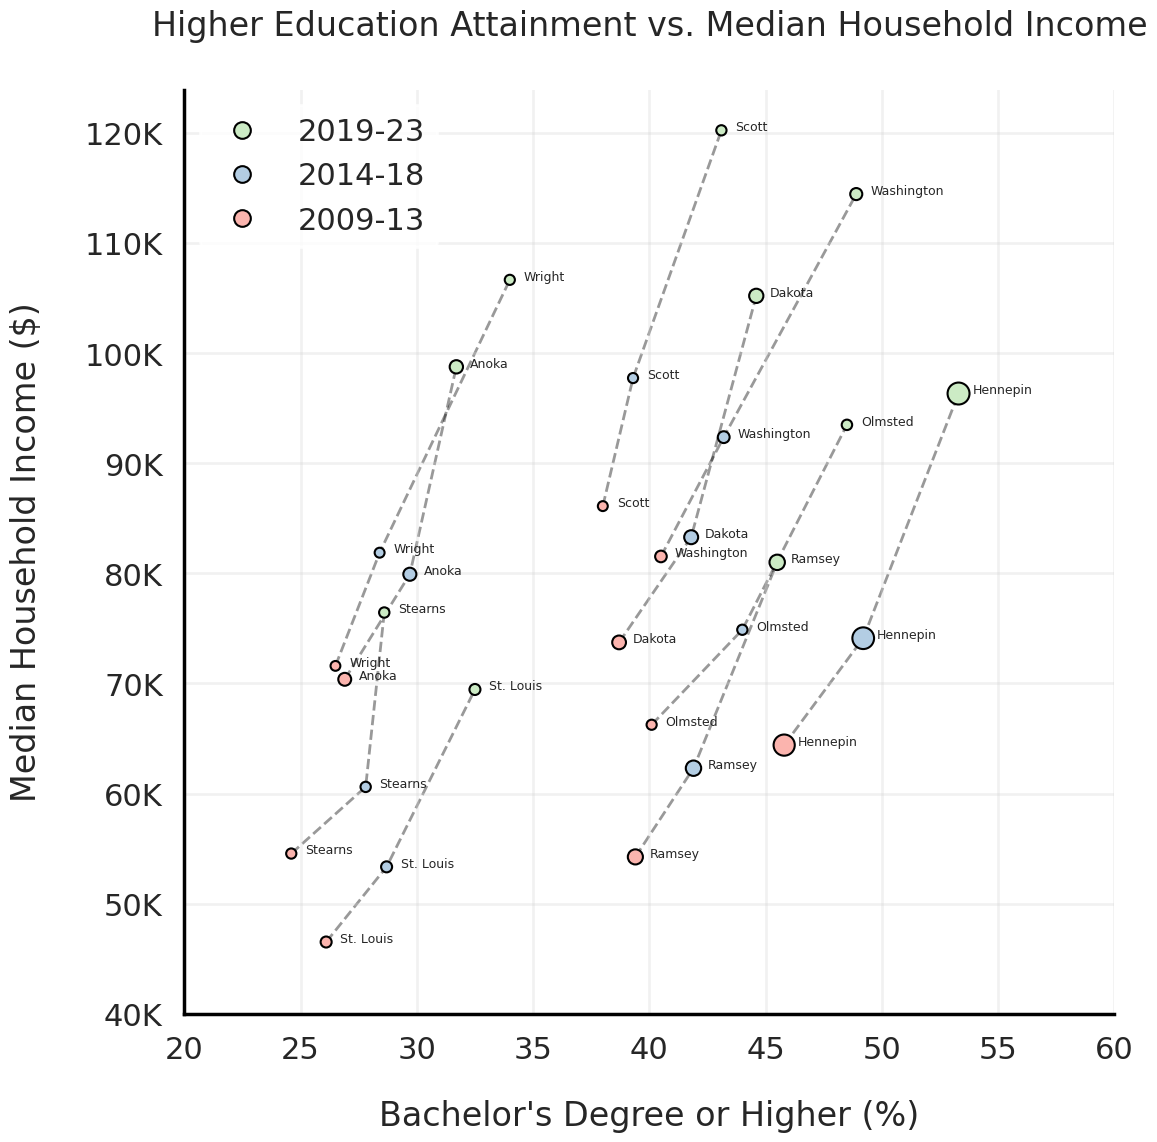

In [12]:
# Higher Education Attainment vs. Median Household Income

fig, ax = plt.subplots(figsize=(12, 12))
order = sorted(ecoedu_df.County)

# Puts the scatter marks
sns.scatterplot(
    ecoedu_df, x='BachelorsOrHigher', y='MedianHouseholdIncome',
    size='Population', sizes=(50, 250),
    ax=ax, edgecolor='black', linewidth=1.5,
    hue='Year', style_order=order,
    zorder=10,
);

ax.set(
    xlim=[20, 60],
    ylim=[40_000, None],
);

##
for gname, group_rows in ecoedu_df.groupby('County'):
    sns.lineplot(
        group_rows, x='BachelorsOrHigher', y='MedianHouseholdIncome',
        ax=ax, c='black', alpha=0.4, linestyle='--', linewidth=2,
        zorder=0,
    )

    for x, y, yr in zip(
        group_rows.BachelorsOrHigher,
        group_rows.MedianHouseholdIncome,
        group_rows.Year,
    ):
        ax.text(x=x+0.6, y=y, s=gname, fontdict={'size': 9}, zorder=10);

ax.set_ylabel(ylabel='Median Household Income ($)', labelpad=30);
ax.set_xlabel(xlabel="Bachelor's Degree or Higher (%)", labelpad=25);
ax.yaxis.set_major_formatter(lambda y, pos: f'{y//1000:.0f}K');

ax.grid(c='lightgray', alpha=0.3);
ax.spines[['right', 'top']].set_visible(False);
ax.spines[['left', 'bottom']].set_color('black')

# Get handles and labels
handles, labels = ax.get_legend_handles_labels()

# Keep only desired entries
filtered = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if 1 <= i <= 3]

# Rebuild legend
if filtered:
    handles, labels = zip(*filtered)
    ax.legend(
        handles, labels, ncols=1, title=None, frameon=True, edgecolor='white',
        reverse=True,
    )
else:
    ax.legend().remove()

ax.set_title(f"Higher Education Attainment vs. Median Household Income", y=1.05);

plt.show()

**Observations**
- …
- …

### High School Graduate vs. Median Household Income

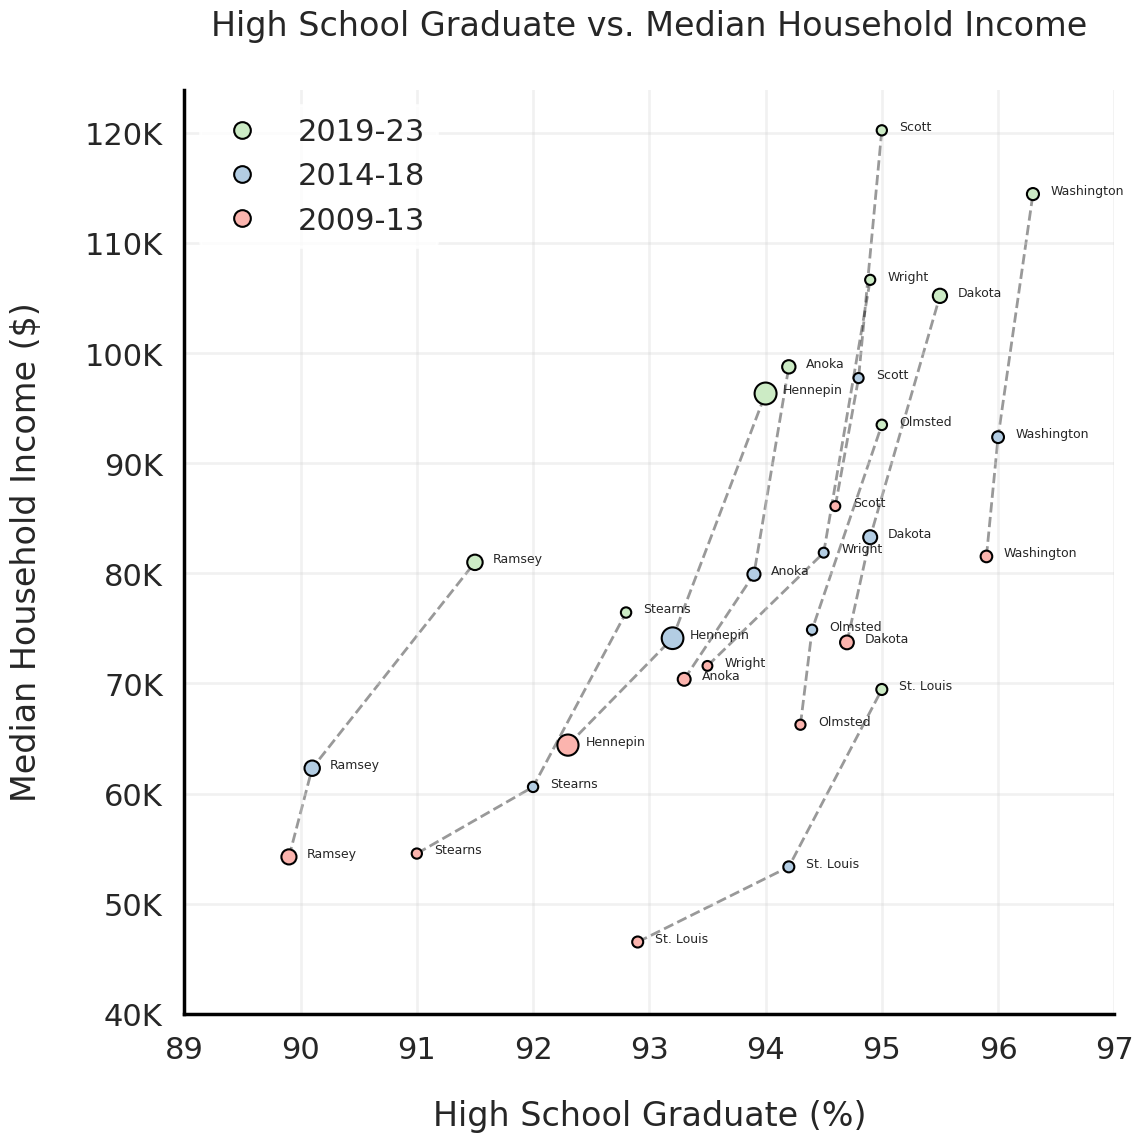

In [13]:
# High School Graduate vs. Median Household Income

fig, ax = plt.subplots(figsize=(12, 12))
order = sorted(ecoedu_df.County)

# Puts the scatter marks
sns.scatterplot(
    ecoedu_df, x='HighSchoolGraduationRate', y='MedianHouseholdIncome',
    size='Population', sizes=(50, 250),
    ax=ax, edgecolor='black', linewidth=1.5,
    hue='Year', style_order=order,
    zorder=10,
);

ax.set(
    xlim=[89, 97],
    ylim=[40_000, None],
);

##
for gname, group_rows in ecoedu_df.groupby('County'):
    sns.lineplot(
        group_rows, x='HighSchoolGraduationRate', y='MedianHouseholdIncome',
        ax=ax, c='black', alpha=0.4, linestyle='--', linewidth=2,
        zorder=0,
    )

    for x, y, yr in zip(
        group_rows.HighSchoolGraduationRate,
        group_rows.MedianHouseholdIncome,
        group_rows.Year,
    ):
        ax.text(x=x+0.15, y=y, s=gname, fontdict={'size': 9}, zorder=10);

ax.set_ylabel(ylabel='Median Household Income ($)', labelpad=30);
ax.set_xlabel(xlabel="High School Graduate (%)", labelpad=25);
ax.yaxis.set_major_formatter(lambda y, pos: f'{y//1000:.0f}K');

ax.grid(c='lightgray', alpha=0.3);
ax.spines[['right', 'top']].set_visible(False);
ax.spines[['left', 'bottom']].set_color('black')

# Get handles and labels
handles, labels = ax.get_legend_handles_labels()

# Keep only desired entries
filtered = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if 1 <= i <= 3]

# Rebuild legend
if filtered:
    handles, labels = zip(*filtered)
    ax.legend(
        handles, labels, ncols=1, title=None, frameon=True, edgecolor='white',
        reverse=True,
    )
else:
    ax.legend().remove()

ax.set_title(f"High School Graduate vs. Median Household Income", loc='center',
             y=1.05);

plt.show()

**Observations**
- …
- …

### Homeownership Rate vs. Median Household Income  

*Why*: Explore homeownership ↔ income across counties

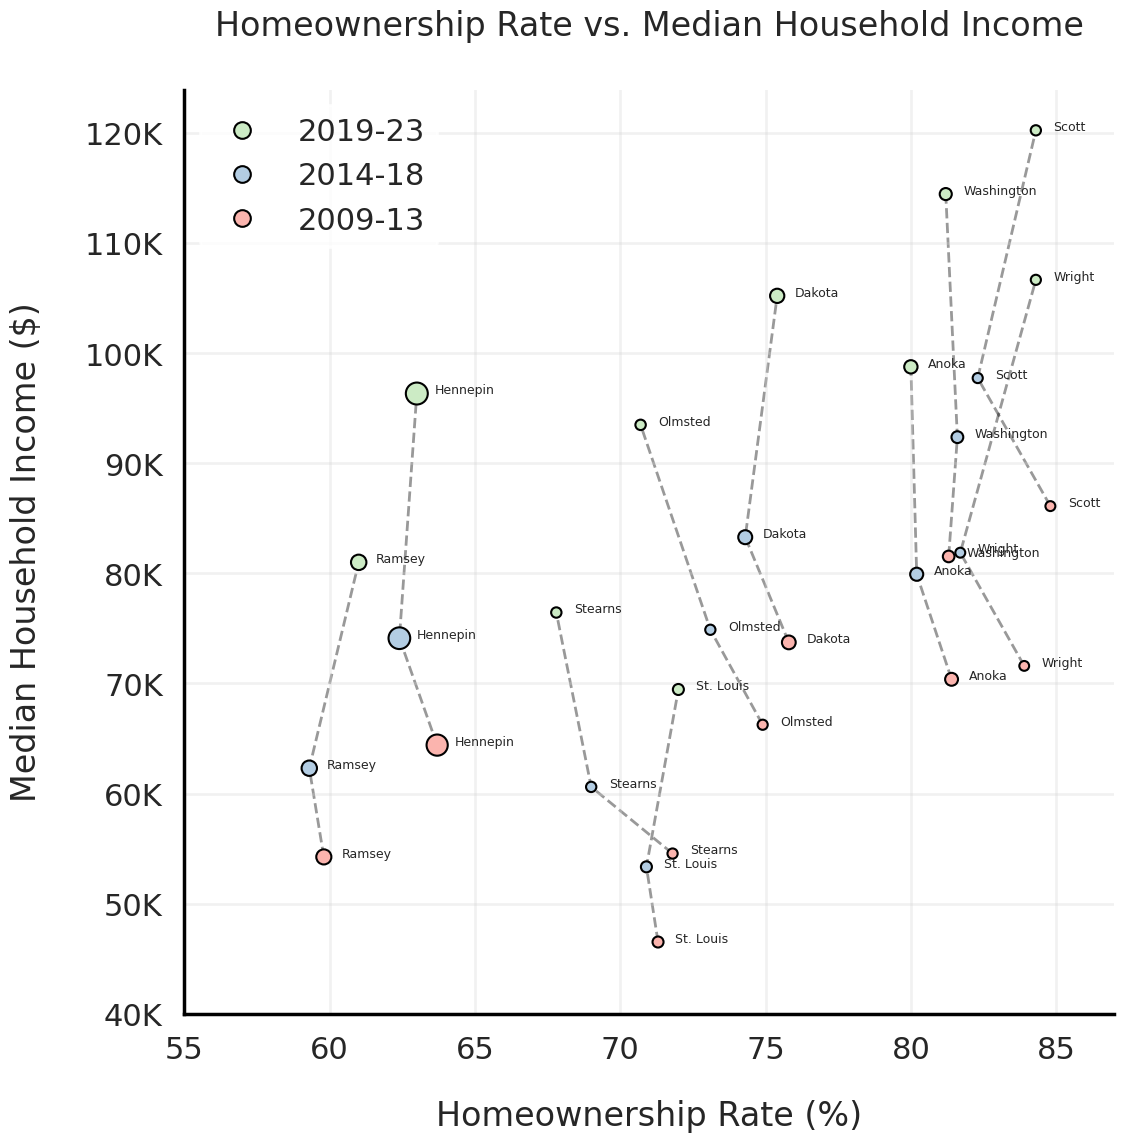

In [14]:
# Homeownership Rate vs. Median Household Income

# This forces the points to be linked according to the year range in ascending order
ecohouse_df['Year'] = pd.Categorical(
    ecohouse_df['Year'],
    categories=['2009-13','2014-18','2019-23'],
    ordered=True
)

fig, ax = plt.subplots(figsize=(12, 12))
order = sorted(ecohouse_df.County)

### puts the scatter marks
sns.scatterplot(
    ecohouse_df, x='HomeownershipRate', y='MedianHouseholdIncome',
    size='Population', sizes=(50, 250),
    ax=ax, edgecolor='black', linewidth=1.5,
    hue='Year', style_order=order,
    zorder=10,
);

ax.set(xlim=[55, 87], ylim=[40_000, None],
);

##
for gname, group_rows in ecohouse_df.groupby('County'):
    group_rows = group_rows.sort_values('Year')
    sns.lineplot(
        data=group_rows, x='HomeownershipRate', y='MedianHouseholdIncome',
        ax=ax, c='black', alpha=0.4, linestyle='--', linewidth=2, sort=False,
        zorder=0,
    )

    for x, y, yr in zip(
        group_rows.HomeownershipRate,
        group_rows.MedianHouseholdIncome,
        group_rows.Year,
    ):
        ax.text(x=x+0.6, y=y, s=gname, fontdict={'size': 9}, zorder=10);

ax.set_ylabel(ylabel='Median Household Income ($)', labelpad=30);
ax.set_xlabel(xlabel="Homeownership Rate (%)", labelpad=25);
ax.yaxis.set_major_formatter(lambda y, pos: f'{y//1000:.0f}K');

ax.grid(c='lightgray', alpha=0.3);
ax.spines[['right', 'top']].set_visible(False);
ax.spines[['left', 'bottom']].set_color('black')

# Get handles and labels
handles, labels = ax.get_legend_handles_labels()

# Keep only desired entries
filtered = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if 1 <= i <= 3]

# Rebuild legend
if filtered:
    handles, labels = zip(*filtered)
    ax.legend(
        handles, labels, ncols=1, title=None, frameon=True, edgecolor='white', reverse=True,
    )
else:
    ax.legend().remove()

ax.set_title(f'Homeownership Rate vs. Median Household Income', y=1.05);

plt.show()

**Observations**

Overall: Most counties show rising incomes over time, but homeownership
rates remain more scattered.

Notable Outliers:


*   Hennepin and Ramsey show significant income growth without major
increases in homeownership. Both counties are the lowest in that metric.
*   Anoka, Scott, Washington, and Wright show both high income and high
homeownership rates.


### Immigrant & Racial/Ethnic Group Trends  
*Why*: Track non-White & immigrant population shifts

Immigrant Population by County and Year

In [15]:
fig = px.bar(demo_df, x='ImmigrantPop', y='County', color='Year',
             barmode='group', orientation='h', text='ImmigrantPop',
             title="Immigrant Population by County and Year",
             labels={'ImmigrantPop':'Immigrant Population (%)'}, height=1300)

fig.update_layout(title_x=0.5,
                  yaxis={'categoryorder':'total ascending','automargin':True},
                  bargap=0.2, bargroupgap=0.1)

fig.show()

**Observations**
- …
- …

Next Highest Racial/Ethnic Population by County and Year

In [17]:
# Created aliases for improved readability
group_aliases = {
    'Black/African American': 'Black',
    'Asian': 'Asian',
    'Hispanic/Latino': 'Hispanic/Latino',
    'American Indian/Alaskan Native': 'Native',
}

demo_df['CombinedNextHighest'] = demo_df['NextHighestPopGrp'].map(group_aliases) + ': ' + demo_df['NextHighestPop'].astype(str)

fig = px.bar(demo_df, x='NextHighestPop', y='County', color='Year',
             barmode='group', orientation='h',
             text='CombinedNextHighest',
             title="Next Highest Racial/Ethnic Population by County and Year",
             labels={'NextHighestPop':'Next Highest Population (%)'},
             height=1300)

fig.update_layout(title_x=0.5,
                  yaxis={'categoryorder':'total ascending','automargin':True},
                  bargap=0.2, bargroupgap=0.1)
fig.show()

## 5. Key Findings & Conclusions


*   Educational attainment above the high school level emerges as the
strongest predictor of income growth.
*   Urban/Suburban counties (Hennepin, Ramsey, Dakota, Washington)
started with higher incomes and education levels and made the largest
gains.
*   More rural counties (Stearns, St. Louis, Wright) showed slower growth in
education and income, despite consistently high homeownership rates.
*   Immigrant populations rose across the board. Furthermore, in nearly
every county, the largest non-White group remained the same but grew
in size, with only a few exceptions in some of the smaller counties.